# Customer Segmentation and Profiling

## K Means Clustering Technique

In [242]:
## Used Euclidean distance ; k means clustering uses euclidean distance.

In [243]:
## kmeans++ algorithm : Dealts with random initialization trap.

WCSS : Within Cluster Sum of Squares
Using elbow chart: See wcss decreasing substaintially upto what k, it would look like an elbow.

## Importing the libraries

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [245]:
# let's load the Mall Customers dataset
# and explore its shape

dataset = pd.read_csv("Mall_Customers.csv")
dataset.shape

(200, 5)

## Pre-Processing

In [246]:
## let's visualize the dataset
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [247]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [248]:
dataset.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Figure size 432x288 with 0 Axes>

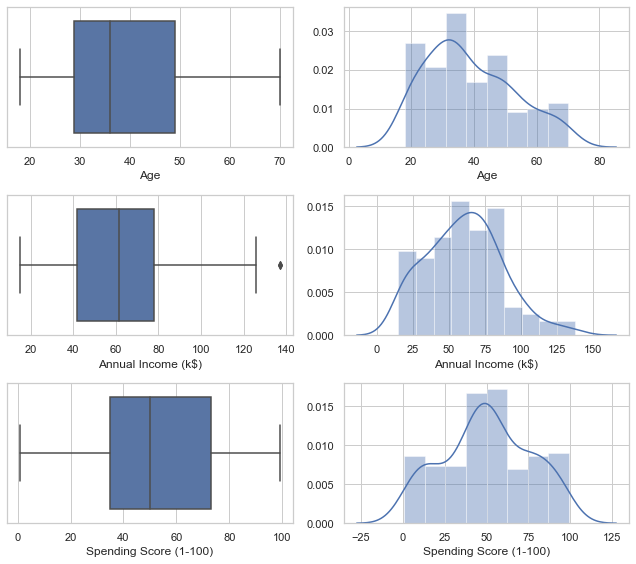

In [249]:
## Let's look at the distribution
sns.set(style = 'whitegrid')
plt.clf()

## Make a function to create plots
def create_plot(columns):
    fig, axs = plt.subplots(3,2, figsize = (9,8))
    for i, col in enumerate(columns):
        sns.boxplot(dataset[col], ax = axs[i][0])
        sns.distplot(dataset[col], ax = axs[i][1])
#         axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(dataset[col].mean(),dataset[col].median(),dataset[col].std()))
#     plt.setp(axs)
    plt.tight_layout()
    plt.show()
    
## calling create_plot function
numerical_columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
create_plot(numerical_columns)

# plt.figure(figsize=(10, 6))
# sns.distplot(dataset['Annual Income (k$)'])
# plt.title('Distribution of Annual Income (k$)', fontsize = 20)
# plt.xlabel('Range of Annual Income (k$)')
# plt.ylabel('Count')
# plt.show()

In [250]:
## Treating Outliers

Q1 = dataset['Annual Income (k$)'].quantile(0.25)
Q3 = dataset['Annual Income (k$)'].quantile(0.75)

print('Q1 = {} and Q3 = {}'.format(Q1,Q3))
IQR = Q3-Q1
outlier_lowerlimit = Q1-1.5*IQR
outlier_upperlimit = Q3+1.5*IQR
print('Outlier_lowerlimit = {} and outlier_lowerlimit = {}'.format(outlier_lowerlimit,outlier_upperlimit))

Q1 = 41.5 and Q3 = 78.0
Outlier_lowerlimit = -13.25 and outlier_lowerlimit = 132.75


In [251]:
outliers = dataset[(dataset['Annual Income (k$)']>outlier_upperlimit)|(dataset['Annual Income (k$)']<outlier_lowerlimit)]
outliers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


There are several ways to treat outliers. As you can see above, because here there are only two outliers, so I use the method of removing the two data outliers. Furthermore, the dataset that is free from outliers is stored for use in the final stage of modeling.

In [252]:
print("initial dataset size = ", dataset.shape)
dataset = dataset[~((dataset['Annual Income (k$)']>outlier_upperlimit)|(dataset['Annual Income (k$)']<outlier_lowerlimit))]
print("Final dataset size = ",dataset.shape )

initial dataset size =  (200, 5)
Final dataset size =  (198, 5)


In [253]:
# #Distribution of Age
# plt.figure(figsize=(10, 6))
# sns.set(style = 'whitegrid')
# sns.distplot(dataset['Age'])
# plt.title('Distribution of Age', fontsize = 20)
# plt.xlabel('Range of Age')
# plt.ylabel('Count')
# plt.show()

In [254]:
# #Distribution of Spending score
# plt.figure(figsize=(10, 6))
# sns.set(style = 'whitegrid')
# sns.distplot(dataset['Spending Score (1-100)'])
# plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
# plt.xlabel('Range of Spending Score (1-100)')
# plt.ylabel('Count')
# plt.show()

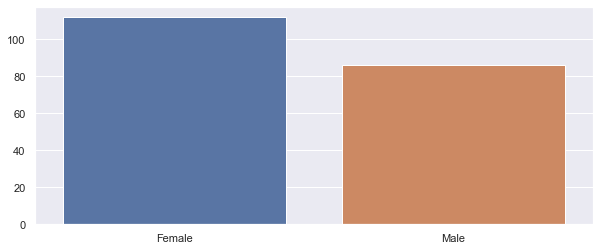

In [255]:
genders = dataset.Genre.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [256]:
# find the variables with missing observations
vars_with_na = [var for var in dataset.columns if dataset[var].isnull().mean()>0]
vars_with_na

[]

There are no missing values in dataset

In [257]:
# ## one hot encoding
# dataset['Genre'].unique()

In [258]:
# dataset = pd.concat([dataset,pd.get_dummies(dataset['Genre'])], axis=1)
# dataset.head()

In [259]:
category_column = ['Genre']
for col in category_column:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])
    
dataset.head()    

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [260]:
X = dataset.iloc[:,1:].values
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

In [261]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X)

# transform train and test sets
X_scaled = scaler.transform(X)

## Using the elbow method to find the optimal number of clusters

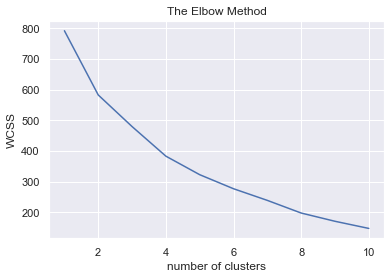

In [262]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state =75)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) 
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K means model on the dataset

In [296]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state =42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [297]:
print(y_kmeans)

[2 2 4 4 4 4 1 4 3 4 3 4 1 4 2 2 4 2 3 4 2 2 1 2 1 2 1 2 1 4 3 4 3 2 1 4 1
 4 1 4 1 2 3 4 1 4 1 4 4 4 1 2 4 3 1 3 1 3 4 3 3 2 1 1 3 2 1 1 2 4 3 1 1 1
 3 2 1 2 4 1 3 2 3 1 4 3 1 4 4 1 1 2 3 1 4 2 1 4 3 2 4 1 3 2 3 4 1 3 3 3 3
 4 1 2 4 4 1 1 1 1 2 1 1 5 4 5 3 5 3 5 0 5 4 5 0 5 0 5 0 5 0 5 4 5 0 5 3 5
 0 5 0 5 0 5 0 5 0 5 0 5 1 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0
 5 0 5 0 5 0 5 0 5 0 5 0 5]


In [298]:
## Adding labels to dataset
dataset['label'] = y_kmeans
dataset.head(20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,4
4,5,0,31,17,40,4
5,6,0,22,17,76,4
6,7,0,35,18,6,1
7,8,0,23,18,94,4
8,9,1,64,19,3,3
9,10,0,30,19,72,4


## Visualizing the clusters

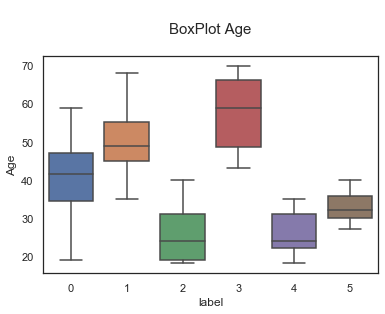

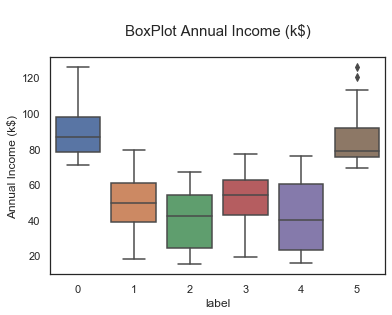

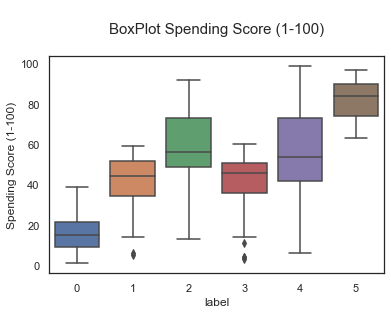

In [299]:
columns_numeric = ['Age','Annual Income (k$)','Spending Score (1-100)']

for i in columns_numeric:
    plt.figure(figsize = (6,4))
    ax = sns.boxplot(x = 'label', y = i, data = dataset)
    plt.title('\nBoxPlot {}\n'.format(i), fontsize =15)
    plt.show()
    
    

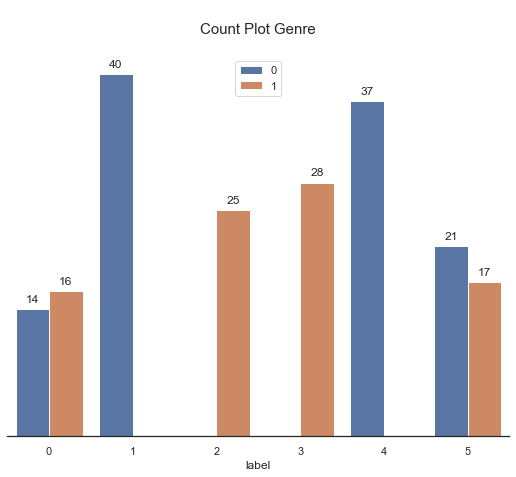

In [300]:
sns.set(style = 'white')
columns_categorical = ['Genre']

for i in columns_categorical:
    plt.figure(figsize = (9,7))
    ax = sns.countplot(x = 'label' , hue = i, data = dataset)
    plt.title('\nCount Plot {}\n'.format(i), fontsize =15)
    ax.legend(loc = "upper center")
    for p in ax.patches:
        ax.annotate(format(p.get_height(),'.0f'),
                   (p.get_x() + p.get_width() / 2.,p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0,10),
        textcoords = 'offset points')
        
    sns.despine(right = True, top = True, left = True)
    ax.axes.yaxis.set_visible(False)
    plt.show()

In [301]:
from sklearn.metrics import silhouette_score

# Calculate Silhoutte Score
score = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.329
